#NLP - Project8 : Edouard Toutounji : June_19_2020

## 1- Essential preprocessing libraries 

In [20]:
# NLP - Project8 : Edouard Toutounji June 20_2020

# 1- Essential preprocessing libraries 

import contractions
import re, string, unicodedata
import contractions
from bs4 import BeautifulSoup

import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2- Data load 

In [21]:
# 2.1 - Data load 

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv ('/content/drive/My Drive/Colab Notebooks/Tweets.csv')
data.shape
data.info()
data.head()
data.isnull().sum(axis=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  obj

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [22]:
# 2.2 'airline_sentiment' needs to be encoded to integers

data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [23]:
labelencoder = LabelEncoder()
data['airline_sentiment_coded'] = labelencoder.fit_transform(data['airline_sentiment'])
data.airline_sentiment_coded.value_counts()

0    9178
1    3099
2    2363
Name: airline_sentiment_coded, dtype: int64

In [24]:
# 2.3 Display Expansion and keeping only the 2 columns needed


# display's expansion 
pd.set_option('display.max_colwidth', None)


# keep columns in question
data = data[['airline_sentiment_coded','text']]
data.head(10)

,airline_sentiment_coded,text
0,1,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials to the experience... tacky.
2,1,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,0,@VirginAmerica and it's a really big bad thing about it
5,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,2,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,1,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,2,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,2,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


## 3- Elementary preprocessing functions ,  and then an encapsulating normaling function. 

In [25]:
# 3- Elementary preprocessing functions ,  and then and encapsulating normaling function.


stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
 
 # # # # # # # # # # # # # # # # # # # # # # # # 
 # The 9 elementary functions:

def strip_html(words):
    temp = BeautifulSoup( words , 'html.parser')
    return temp.get_text()

def replace_contractions(words):
    temp = contractions.fix(words)
    return temp

def remove_numbers(words):
    temp = re.sub(r'\d+', '', words)
    return temp

def tokenize_text(words):
    temp = nltk.word_tokenize(words)
    return temp

def remove_non_ascii (words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii','ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation (words):
    new_words = []
    for word in words:
        new_word = re.sub( r'[^\w\s]','',word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords (words):
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_words (words):
    new_words = []
    for word in words:
            new_words.append(lemmatizer.lemmatize(word))
    return new_words

# # # # # # # # # # # # # # # # # # # # # # # # 


# The encapsulating Normalising function 

def normalize(words):
    words = strip_html(words)
    words = replace_contractions(words)
    words = remove_numbers(words)
    words = tokenize_text(words)
    words = remove_non_ascii (words)
    words = to_lowercase(words)
    words = remove_punctuation (words)
    words = remove_stopwords (words)
    words = lemmatize_words (words)
    return ' '.join(words)


# normalise will iterate on all the cells of the data['text'] column

for i,row in data.iterrows():
    words = data.at[i , 'text']
    words = normalize (words)
    data.at[i , 'text'] = words
    
data.head(10)
                                                                                       
 

,airline_sentiment_coded,text
0,1,virginamerica dhepburn said
1,2,virginamerica plus added commercial experience tacky
2,1,virginamerica today must mean need take another trip
3,0,virginamerica really aggressive blast obnoxious entertainment guest face little recourse
4,0,virginamerica really big bad thing
5,0,virginamerica seriously would pay flight seat playing really bad thing flying va
6,2,virginamerica yes nearly every time fly vx ear worm go away
7,1,virginamerica really missed prime opportunity men without hat parody http tcomwpggrezp
8,2,virginamerica well notbut
9,2,virginamerica amazing arrived hour early good


##4- Libraries for vectorisation and then ML classification 

In [27]:
# 4- Libraries for vectorisation and then ML classification 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 5- Random Forest Model using CountVectoriser

Accuracy score on the whole Data
0.7155737704918033
[[2419  248  117]
 [ 397  424  109]
 [ 172  108  398]]


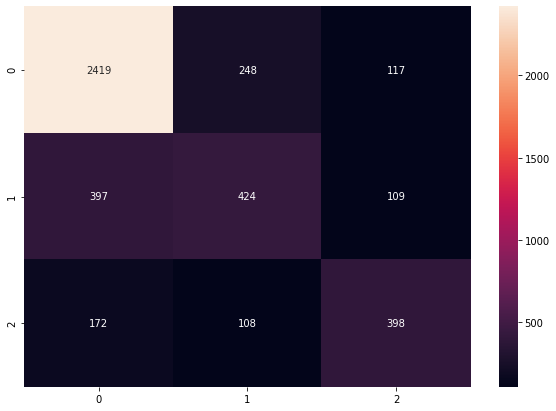

In [30]:
# 5- Random Forest Model using CountVectoriser

vectorizer = CountVectorizer( max_features = 2000)

X = vectorizer.fit_transform(data['text'])
X = X.toarray()
X.shape

y = data['airline_sentiment_coded']
y.shape


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)


# Fitting the model 
forest = RandomForestClassifier(n_estimators = 20 , n_jobs=4)
forest.fit(X_train, y_train)


# Accuracy Score on the whole Data 
print('Accuracy score on the whole Data')
print(np.mean(cross_val_score(forest, X, y , cv =20)))



# Confusion matrix
y_pred = forest.predict(X_test)
cm = confusion_matrix (y_test, y_pred)
print(cm)

df_cm = pd.DataFrame( cm, index = [i for i in '012'] , columns = [i for i in '012'])
plt.figure( figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

##6- Random Forest Model using TfidfVectoriser

Accuracy score on the whole Data
0.7185109289617486
[[2428  238  118]
 [ 391  443   96]
 [ 169  114  395]]


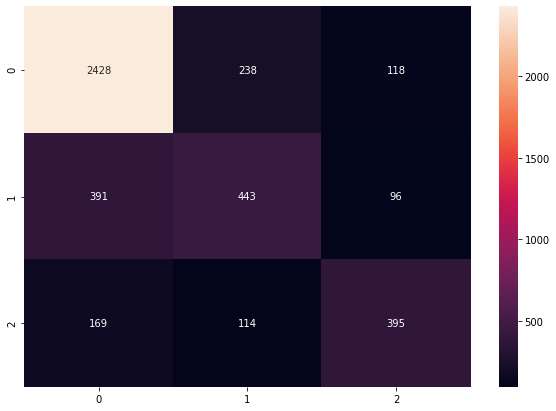

In [31]:
# 6- Random Forest Model using TfidfVectoriser

vectoriser = TfidfVectorizer( max_features = 2000)

X = vectorizer.fit_transform(data['text'])
X = X.toarray()
X.shape

y = data['airline_sentiment_coded']
y.shape


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)


# Fitting the model 
forest = RandomForestClassifier(n_estimators = 20 , n_jobs=4)
forest.fit(X_train, y_train)


# Accuracy Score on the whole Data 
print('Accuracy score on the whole Data')
print(np.mean(cross_val_score(forest, X, y , cv =20)))



# Confusion matrix
y_pred = forest.predict(X_test)
cm = confusion_matrix (y_test, y_pred)
print(cm)

df_cm = pd.DataFrame( cm, index = [i for i in '012'] , columns = [i for i in '012'])
plt.figure( figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

##7- Final thoughts on CountVectoriser vs. TfidfVectoriser

Tfdif is barely slighlty better at classifying the text.

Accuracy scores:
*   CountVectorizer: 0.7155737704918033
*   TfIdfVectorizer: 0.7185109289617486



Also the results took a long time to be processed on Colab with the hyperpapramters above.

________________________________________________________________

The initial trials for both Vectotization approaches was initially run with half the above:
*   max_features = 1000
*   n_estimators = 10
*   cv = 10

The results were faster but slighly less in terms of accuracy, both approaching the 70% correct classification rate.

Accuracy scores:
*   CountVectorizer: 0.6895491803278688
*   TfIdfVectorizer: 0.6962431693989071







Thank you GL team, the journey was not easy but so much worth it!

Edouard Toutounji



